# 7.7 Applications to Polymers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interactive

Model a polymer of length $N$ as chain on a rectangular lattice.

In [477]:
def walker2D(N = 100, # number of steps
             x0 = 0, # initial position
             y0 = 0, 
             a = 1, # step size
            ):
    
    xAccum = np.zeros(N+1)
    yAccum = np.zeros(N+1)
    
    x = x0
    y = y0
    for n in range(N+1):
        
        xAccum[n] = x
        yAccum[n] = y
        
        r = np.random.rand()
        if r < 0.25:
            x += a
        elif r < 0.50:
            x -= a
        elif r < 0.75:
            y += a
        else:
            y -= a
        
    return {'x': xAccum[-1],
            'y': yAccum[-1],
            'xAccum': xAccum,
            'yAccum': yAccum}

Each random walk is made up of $N$ steps.

In [478]:
walker2D(N=3)

{'x': 1.0,
 'y': 0.0,
 'xAccum': array([0., 0., 0., 1.]),
 'yAccum': array([0., 1., 0., 0.])}

We want to consider the averages of $M$ such random walkers

(-9.65, 4.65, -7.55, 4.55)

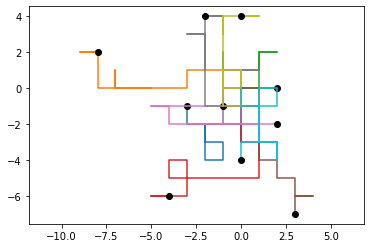

In [479]:
M = 10
for m in range(M):
    walk = walker2D(N=20)
    plt.plot(walk['xAccum'], walk['yAccum'])
    plt.plot(walk['x'], walk['y'], 'ko')

plt.axis('equal')

In [480]:
def generateWalkers(M=10, N=20):

    rows = []
    for t in range(M):
        row = walker2D(N=N)
        rows.append(row)
        

    df = pd.DataFrame(rows)
    
    return df

In [481]:
df = generateWalkers(M=20)

In [482]:
def plot_xy(df):
    for walk in df.itertuples():
        plt.plot(walk.xAccum, walk.yAccum, 'k-', linewidth=0.1)
        plt.plot(walk.x, walk.y, 'k.')
        
    plt.axis('equal')

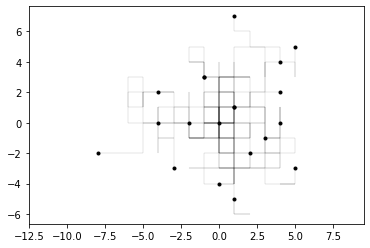

In [483]:
plot_xy(df)

We are interested in calculate statistics over all of the walkers.

$$ \left<x\right>, \left<y\right>, \Delta x^2, \Delta y^2 $$

and

$$R^2 = \left<x^2\right> - \left<x\right>^2 + \left<y^2\right> - \left<y\right>^2 = \Delta x^2 + \Delta y^2 $$

In [484]:
df.x.mean()

0.4

In [485]:
(df.x**2).mean()

11.3

In [486]:
def compute_R(df):
    Δx2 = (df.x**2).mean() -  df.x.mean()**2
    Δy2 = (df.y**2).mean() - df.y.mean()**2
    R2 = Δx2 + Δy2
    R = np.sqrt(R2)
    
    return R

In [487]:
R = compute_R(df)

(-8.65, 5.65, -5.6, 7.6)

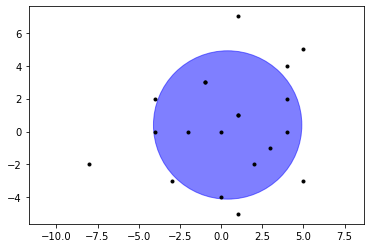

In [488]:
fig, ax = plt.subplots()

plt.plot(df.x, df.y, 'k.')

x_avg = df.x.mean()
y_avg = df.y.mean()
circle1 = plt.Circle((x_avg, y_avg), R, color='b', alpha=0.5)
ax.add_artist(circle1)

plt.axis('equal')

In [490]:
df = generateWalkers(N=500, M=1000)
R = compute_R(df)
R

22.194953615630737

(-53.9, 53.9, -59.6, 63.6)

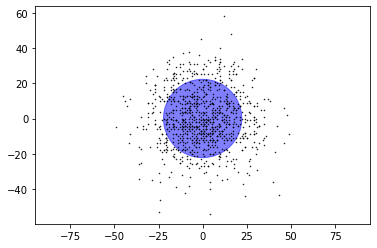

In [491]:
fig, ax = plt.subplots()

plt.plot(df.x, df.y, 'k.', markersize=1)

x_avg = df.x.mean()
y_avg = df.y.mean()
circle1 = plt.Circle((x_avg, y_avg), R, color='b', alpha=0.5)
ax.add_artist(circle1)

plt.axis('equal')

We are interested in how $R$ depends on $N$

In [492]:
rows = []
for N in [8, 16, 32, 64, 128, 256]:
    df = generateWalkers(N=N, M=2000)
    
    R = compute_R(df)
    
    row = {'N':N, 'R': R}
    rows.append(row)
df = pd.DataFrame(rows)

df

,N,R
0,8,2.875254
1,16,4.006512
2,32,5.583329
3,64,7.996745
4,128,11.574736
5,256,15.827119


Assume that $R = \sqrt{R^2}$ has the asymptotic $N$ dependence:

$$R \sim N^\nu$$

and we want to estimate $\nu$

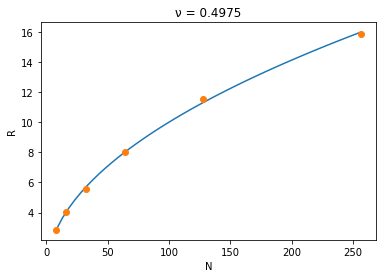

In [493]:
def estimate_ν(df):
    ν, C = np.polyfit(np.log(df.N), np.log(df.R), 1)

    N = np.linspace(df.N.min(), df.N.max(), 50)
    R_fit = N**ν*np.exp(C)

    plt.plot(N, R_fit, '-')
    plt.plot(df.N, df.R, 'o')

    plt.xlabel('N')
    plt.ylabel('R')
    plt.title(f'ν = {ν:.4f}')

estimate_ν(df)

## Self-avoiding walk

Problem 7.28

In [494]:
def SAW(N = 100, # number of steps
        x0 = 0, # initial position
        y0 = 0, 
        a = 1, # step size
        ):
    
    xAccum = np.zeros(N+1)*np.nan
    yAccum = np.zeros(N+1)*np.nan
    
    x = x0
    y = y0
    xAccum[0] = x
    yAccum[0] = y
    
    for n in range(N):

        # pick a random direction
        r = np.random.rand()
        if r < 0.25:
            x += a
        elif r < 0.50:
            x -= a
        elif r < 0.75:
            y += a
        else:
            y -= a

        # check if that the move would be invalid
        valid = True
        for i in range(n):
            if x==xAccum[i] and y==yAccum[i]:
                valid = False

        if not valid:
            break
        
        xAccum[n+1] = x
        yAccum[n+1] = y
        
    return {'valid': valid,
            'x': xAccum[-1],
            'y': yAccum[-1],
            'xAccum': xAccum,
            'yAccum': yAccum,
            }

In [495]:
walk = SAW(N=3)
walk

{'valid': True,
 'x': 0.0,
 'y': 1.0,
 'xAccum': array([0., 1., 1., 0.]),
 'yAccum': array([0., 0., 1., 1.])}

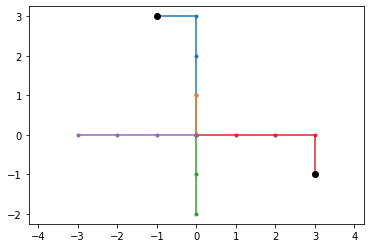

In [496]:
M = 5
for m in range(M):
    walk = SAW(N=4)
    plt.plot(walk['xAccum'], walk['yAccum'], '.-')
    plt.plot(walk['x'], walk['y'], 'ko')

plt.axis('equal')
plt.show()

In [558]:
def generateSAW(M=100, N=10):

    rows = []
    for t in range(M):
        row = SAW(N=N)
        rows.append(row)

    df = pd.DataFrame(rows)
    
    return df

In [559]:
df = generateSAW(M=10, N=5)
df

,valid,x,y,xAccum,yAccum
0,False,NaN,NaN,"[0.0, -1.0, -2.0, -2.0, -1.0, nan]","[0.0, 0.0, 0.0, -1.0, -1.0, nan]"
1,False,NaN,NaN,"[0.0, 1.0, nan, nan, nan, nan]","[0.0, 0.0, nan, nan, nan, nan]"
2,True,2.0,3.0,"[0.0, 1.0, 1.0, 1.0, 1.0, 2.0]","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0]"
3,False,NaN,NaN,"[0.0, 0.0, -1.0, -1.0, nan, nan]","[0.0, 1.0, 1.0, 2.0, nan, nan]"
4,False,NaN,NaN,"[0.0, 0.0, -1.0, nan, nan, nan]","[0.0, 1.0, 1.0, nan, nan, nan]"
5,False,NaN,NaN,"[0.0, 0.0, 0.0, -1.0, -1.0, nan]","[0.0, 1.0, 2.0, 2.0, 3.0, nan]"
6,False,NaN,NaN,"[0.0, -1.0, -1.0, 0.0, nan, nan]","[0.0, 0.0, 1.0, 1.0, nan, nan]"
7,False,NaN,NaN,"[0.0, 1.0, 1.0, 0.0, nan, nan]","[0.0, 0.0, -1.0, -1.0, nan, nan]"
8,False,NaN,NaN,"[0.0, 0.0, nan, nan, nan, nan]","[0.0, 1.0, nan, nan, nan, nan]"
9,False,NaN,NaN,"[0.0, 0.0, nan, nan, nan, nan]","[0.0, -1.0, nan, nan, nan, nan]"


In [560]:
df[df.valid]

,valid,x,y,xAccum,yAccum
2,True,2.0,3.0,"[0.0, 1.0, 1.0, 1.0, 1.0, 2.0]","[0.0, 0.0, 1.0, 2.0, 3.0, 3.0]"


What is fraction $f(N)$ of successful attempts at constructing a chain of length $N$?

In [561]:
M = 10000
rows = []
for N in range(1, 20):

    df = generateSAW(M=M, N=N)
    
    N_valid = len(df[df.valid])
    row = {'N': N,
           'N_valid' : N_valid,
           'f': N_valid / M}
    
    rows.append(row)
df = pd.DataFrame(rows)
df

,N,N_valid,f
0,1,10000,1.0000
1,2,7492,0.7492
2,3,5585,0.5585
3,4,3899,0.3899
4,5,2724,0.2724
5,6,1816,0.1816
6,7,1259,0.1259
7,8,877,0.0877
8,9,656,0.0656
9,10,435,0.0435


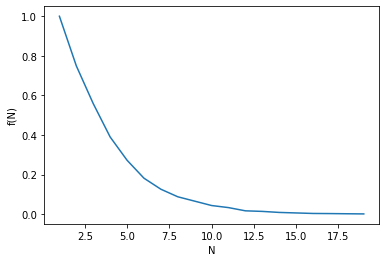

In [562]:
plt.plot(df.N, df.f)
plt.xlabel('N')
plt.ylabel('f(N)')
plt.show()

In [728]:
M = 10000
rows = []
for N in [2, 4, 8, 16]:

    df = generateSAW(M=M, N=N)
    R = compute_R(df)

    row = {'N': N,
           'R': R}
    
    rows.append(row)
df = pd.DataFrame(rows)
df

,N,R
0,2,0.945453
1,4,2.157524
2,8,3.783889
3,16,6.029792


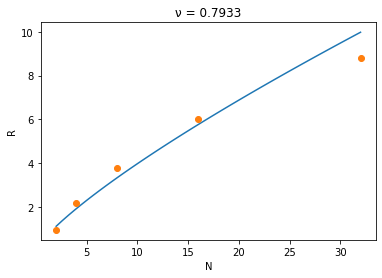

In [727]:
estimate_ν(df)

## Enrichment

In [705]:
def SAW(N = 100, # number of steps
        x0 = 0, # initial position
        y0 = 0, 
        ):
    
    L = np.zeros((2*N+1, 2*N+1), np.bool)
    
    x = x0
    y = y0
    
    L[x, y] = True
    w = 1
    # assume first move is "North"
    y += 1
    L[x, y] = True
    
    valid = True
    for n in range(1, N):

        allMoves = [ (1,0), (-1, 0), (0, 1), (0, -1)]
        validMoves = []
        for move in allMoves:
            dx, dy = move
            if not L[x+dx, y+dy]:
                validMoves.append(move)
        
        m = len(validMoves)
        
        if m == 0:
            # there are no possible valid moves
            valid = False
            w = 0
            break
        elif m == 1:
            # only one possible choice
            w = 1/3 * w
            move = validMoves[0]
        elif m == 2:
            # two possible choices
            w = 2/3 * w
            r = np.random.rand()
            if r < 1/2:
                move = validMoves[0]
            else:
                move = validMoves[1]
        else: # m==3
            # three possible choices
            w = w
            r = np.random.rand()
            if r < 1/3:
                move = validMoves[0]
            elif r < 2/3:
                move = validMoves[1]
            else:
                move = validMoves[2]         

        dx, dy = move
        x += dx
        y += dy
        
        L[x, y] = True
        
    return {'valid': valid,
            'w': w,
            'x': x,
            'y': y
            }

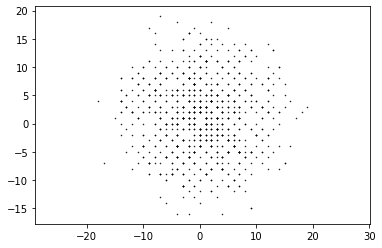

In [706]:
M = 1000
for m in range(M):
    walk = SAW(N=32)
    plt.plot(walk['x'], walk['y'], 'k.', markersize=1)

plt.axis('equal')
plt.show()

In [722]:
df = generateSAW(M=100, N=4)
df['R2'] = df.x**2 + df.y**2

#df[df.valid]
(df.w*df.R2).sum() / df.w.sum()

7.338078291814947

In [718]:
df.w.sum()

0.0009851724273134519

In [725]:
M = 10000
rows = []
for N in [8, 16, 32, 64, 128, 256]:

    df = generateSAW(M=M, N=N)
    df = df[df.valid]
    df['R2'] = df.x**2 + df.y**2
    R2 = (df.w*df.R2).sum() / df.w.sum()
    R = np.sqrt(R2)
    
    N_valid = len(df[df.valid])
    row = {'N': N,
           'N_valid' : N_valid,
           'f': N_valid / M,
           'R': R
            }
    
    rows.append(row)
df = pd.DataFrame(rows)
df

,N,N_valid,f,R
0,8,9973,0.9973,4.373777
1,16,9507,0.9507,7.247658
2,32,7837,0.7837,12.076682
3,64,4477,0.4477,19.608335
4,128,1217,0.1217,33.107941
5,256,72,0.0072,39.308067


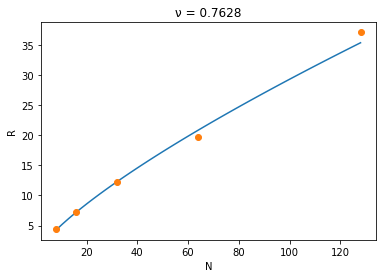

In [724]:
estimate_ν(df)